# TASK 2 GIVEN BY BHARAT INTERN INTERNSHIP

STOCK PRIDICTION USING TCS STOCK DATASET BY (PRACHI GOTHWAL)

################################### IMPORTING LIBRARIES ######################################

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

DATASET FETCHING

In [2]:
#importing the dataset

df = pd.read_csv('C:\\Users\\Prachi Gothwal\\OneDrive\\Desktop\\tcsstockdata.csv')
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,TCS,2023-07-07 00:00:00+00:00,3.17,3.248,3.1400,3.16,173903,3.17,3.248,3.1400,3.16,173903,0.0,1.0
1253,TCS,2023-07-10 00:00:00+00:00,3.23,3.310,3.1500,3.15,243824,3.23,3.310,3.1500,3.15,243824,0.0,1.0
1254,TCS,2023-07-11 00:00:00+00:00,3.30,3.320,3.2100,3.24,326412,3.30,3.320,3.2100,3.24,326412,0.0,1.0
1255,TCS,2023-07-12 00:00:00+00:00,3.20,3.380,3.2000,3.35,350516,3.20,3.380,3.2000,3.35,350516,0.0,1.0
1256,TCS,2023-07-13 00:00:00+00:00,3.26,3.280,3.1415,3.23,371385,3.26,3.280,3.1415,3.23,371385,0.0,1.0


In [3]:
df1 = df.reset_index()['close']
df1.shape

(1257,)

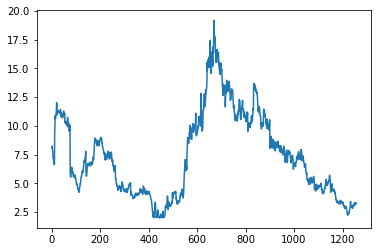

In [4]:
#displaying how the close values are distributed
plt.plot(df['close'])

In [5]:
#scaling down the values between (0,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
#it has now transformed into an array containing values between 0 and 1
print(df1)

[[0.35523256]
 [0.3622093 ]
 [0.35232558]
 ...
 [0.07616279]
 [0.07034884]
 [0.07383721]]


# PREPROCESSING DATA

In [7]:
train_len = int(len(df1)*0.65)        #65% of dataset is used as training dataset
test_len = int(len(df1)-train_len)    #rest of dataset is used as testing dataset


train_data = df1[0:train_len:]
test_data = df1[train_len:len(df1):1]

In [8]:
train_len,test_len

(817, 440)

In [9]:
len(train_data),len(test_data)

(817, 440)

In [10]:
#convert array of values into a dataset matrix
def create_dataset(dataset,time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [11]:
time_step = 100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [12]:
print(x_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [13]:
print(x_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

# CREATING LSTM MODEL

In [14]:
#reshaping the x_train and x_test data into 3-Dimension

#reshpae input to be [sample, time steps, features] which is required for LSTM

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #The last '1' with comma makes it 3-D
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [15]:
#Creating a stacked LSTM model

model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=50, batch_size=64, verbose=1)

Epoch 1/50
12/12 [==============================] - 6s 199ms/step - loss: 0.0495 - val_loss: 0.0025
Epoch 2/50
12/12 [==============================] - 1s 125ms/step - loss: 0.0109 - val_loss: 0.0080
Epoch 3/50
12/12 [==============================] - 1s 124ms/step - loss: 0.0048 - val_loss: 8.5645e-04
Epoch 4/50
12/12 [==============================] - 1s 122ms/step - loss: 0.0031 - val_loss: 6.2843e-04
Epoch 5/50
12/12 [==============================] - 2s 133ms/step - loss: 0.0029 - val_loss: 6.6651e-04
Epoch 6/50
12/12 [==============================] - 2s 126ms/step - loss: 0.0027 - val_loss: 6.9529e-04
Epoch 7/50
12/12 [==============================] - 1s 123ms/step - loss: 0.0025 - val_loss: 8.1976e-04
Epoch 8/50
12/12 [==============================] - 1s 121ms/step - loss: 0.0023 - val_loss: 8.2459e-04
Epoch 9/50
12/12 [==============================] - 1s 120ms/step - loss: 0.0021 - val_loss: 7.9087e-04
Epoch 10/50
12/12 [==============================] - 1s 121ms/step - los

In [18]:
#predicting and checking performance metrics

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 22ms/step


In [19]:
#transform back to original form
#because the data we have scaled down needs to be get in original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
import math
from sklearn.metrics import mean_squared_error

In [21]:
#calculate RMSE performance metrics for train data

math.sqrt(mean_squared_error(y_train,train_predict))

8.299801586128263

In [22]:
#test data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

5.651686576144489

# PRIDICTION PLOTING

In [23]:
#shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict

In [24]:
#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df1)-1, : ] = test_predict

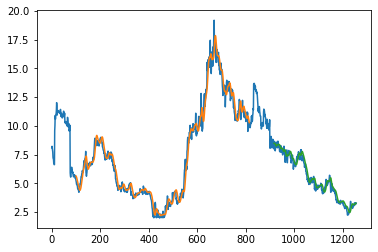

In [25]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test_data)

440

In [27]:
#Last date of our data is 22/6. To predict for 23/6 we need to study previous 100 days data (assume)

440-100

340

In [28]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.17267441860465116,
 0.13895348837209304,
 0.14186046511627903,
 0.14418604651162786,
 0.13604651162790699,
 0.1377906976744186,
 0.13720930232558137,
 0.14186046511627903,
 0.14302325581395348,
 0.14476744186046514,
 0.12906976744186044,
 0.12558139534883722,
 0.13023255813953488,
 0.11802325581395344,
 0.11279069767441859,
 0.10290697674418602,
 0.09127906976744184,
 0.09302325581395347,
 0.08779069767441859,
 0.07732558139534883,
 0.08546511627906976,
 0.08662790697674418,
 0.08081395348837207,
 0.07906976744186046,
 0.07848837209302324,
 0.0767441860465116,
 0.07325581395348836,
 0.07558139534883719,
 0.07558139534883719,
 0.08372093023255812,
 0.08430232558139535,
 0.07732558139534883,
 0.06976744186046512,
 0.0691860465116279,
 0.07732558139534883,
 0.088953488372093,
 0.07906976744186046,
 0.07965116279069766,
 0.07616279069767438,
 0.0813953488372093,
 0.0813953488372093,
 0.0813953488372093,
 0.07790697674418605,
 0.07441860465116278,
 0.08023255813953488,
 0.068023255813953

# PRIDICTION FOR NEXT 30 DAYS

In [30]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input,verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape(1,n_steps,1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.07705342]
101
1 day input [0.13895349 0.14186047 0.14418605 0.13604651 0.1377907  0.1372093
 0.14186047 0.14302326 0.14476744 0.12906977 0.1255814  0.13023256
 0.11802326 0.1127907  0.10290698 0.09127907 0.09302326 0.0877907
 0.07732558 0.08546512 0.08662791 0.08081395 0.07906977 0.07848837
 0.07674419 0.07325581 0.0755814  0.0755814  0.08372093 0.08430233
 0.07732558 0.06976744 0.06918605 0.07732558 0.08895349 0.07906977
 0.07965116 0.07616279 0.08139535 0.08139535 0.08139535 0.07790698
 0.0744186  0.08023256 0.06802326 0.06395349 0.06395349 0.06395349
 0.05813953 0.05523256 0.05       0.04709302 0.05581395 0.05930233
 0.05930233 0.05232558 0.05755814 0.0494186  0.05       0.04186047
 0.03313953 0.03023256 0.01453488 0.01395349 0.0244186  0.02383721
 0.01686047 0.02093023 0.02790698 0.02732558 0.02848837 0.04244186
 0.04767442 0.05232558 0.06569767 0.08372093 0.06511628 0.05988372
 0.06104651 0.05465116 0.06046512 0.05290698 0.05465116 0.04825581
 0.05290698 0.05348837 0.06627907 0

In [31]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [32]:
len(df1)

1257

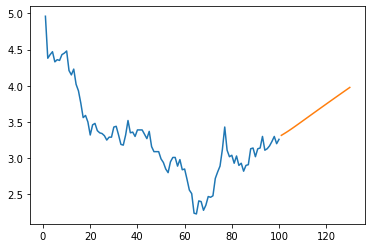

In [33]:
#1157 came from len(df1)-100   that is 1257-100 = 1157
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

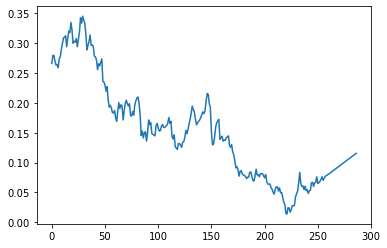

In [34]:
#combined data plotted with prediction
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])